In [52]:
# Import python libraries for various purposes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import sklearn.ensemble as ek
from IPython.display import display
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, learning_curve,  cross_val_score

In [53]:
dataset = pd.read_csv('dataset_malwares.csv')

In [54]:
dataset.shape

(19611, 79)

In [55]:
# display statistical details of numerical columns

dataset.describe()

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
count,19611.0,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.00000,19611.000000,...,1.961100e+04,19611.0,19611.000000,19611.000000,19611.000000,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04
mean,23117.0,178.615726,71.660752,49.146958,37.370710,37.032635,64178.739687,10.418490,226.46530,29.689103,...,3.163632e+09,0.0,6.112437,101.912804,14.131865,3.368566e+05,4.047213e+05,5.555810e+05,1.238834e+06,8.814868e+05
std,0.0,987.200729,1445.192977,1212.201919,864.515405,915.833139,9110.755873,637.116265,1249.68033,1015.303419,...,5.860332e+08,0.0,7.525158,127.076767,154.958102,2.181191e+07,4.704601e+06,6.772167e+06,5.868961e+07,2.167579e+07
min,23117.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,1.073742e+09,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,23117.0,144.000000,3.000000,0.000000,4.000000,0.000000,65535.000000,0.000000,184.00000,0.000000,...,3.221226e+09,0.0,2.000000,17.000000,0.000000,0.000000e+00,2.960400e+04,4.096000e+04,0.000000e+00,0.000000e+00
50%,23117.0,144.000000,3.000000,0.000000,4.000000,0.000000,65535.000000,0.000000,184.00000,0.000000,...,3.221226e+09,0.0,4.000000,80.000000,0.000000,0.000000e+00,8.222400e+04,1.310720e+05,0.000000e+00,0.000000e+00
75%,23117.0,144.000000,3.000000,0.000000,4.000000,0.000000,65535.000000,0.000000,184.00000,0.000000,...,3.221226e+09,0.0,8.000000,135.000000,0.000000,0.000000e+00,2.477080e+05,3.870720e+05,0.000000e+00,3.184640e+05
max,23117.0,59448.000000,63200.000000,64613.000000,43690.000000,43690.000000,65535.000000,61436.000000,65464.00000,63262.000000,...,4.294967e+09,0.0,588.000000,4016.000000,7319.000000,2.147484e+09,5.368914e+08,8.304108e+08,2.906159e+09,2.415919e+09


In [56]:
# What are the columns?

dataset.columns

Index(['Name', 'e_magic', 'e_cblp', 'e_cp', 'e_crlc', 'e_cparhdr',
       'e_minalloc', 'e_maxalloc', 'e_ss', 'e_sp', 'e_csum', 'e_ip', 'e_cs',
       'e_lfarlc', 'e_ovno', 'e_oemid', 'e_oeminfo', 'e_lfanew', 'Machine',
       'NumberOfSections', 'TimeDateStamp', 'PointerToSymbolTable',
       'NumberOfSymbols', 'SizeOfOptionalHeader', 'Characteristics', 'Magic',
       'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode',
       'SizeOfInitializedData', 'SizeOfUninitializedData',
       'AddressOfEntryPoint', 'BaseOfCode', 'ImageBase', 'SectionAlignment',
       'FileAlignment', 'MajorOperatingSystemVersion',
       'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion',
       'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfHeaders',
       'CheckSum', 'SizeOfImage', 'Subsystem', 'DllCharacteristics',
       'SizeOfStackReserve', 'SizeOfStackCommit', 'SizeOfHeapReserve',
       'SizeOfHeapCommit', 'LoaderFlags', 'NumberOfRvaAndSizes', 'Malware',
       '

#Exploratory Data Analysis and Data Preprocessing


In [57]:
dataset.columns

Index(['Name', 'e_magic', 'e_cblp', 'e_cp', 'e_crlc', 'e_cparhdr',
       'e_minalloc', 'e_maxalloc', 'e_ss', 'e_sp', 'e_csum', 'e_ip', 'e_cs',
       'e_lfarlc', 'e_ovno', 'e_oemid', 'e_oeminfo', 'e_lfanew', 'Machine',
       'NumberOfSections', 'TimeDateStamp', 'PointerToSymbolTable',
       'NumberOfSymbols', 'SizeOfOptionalHeader', 'Characteristics', 'Magic',
       'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode',
       'SizeOfInitializedData', 'SizeOfUninitializedData',
       'AddressOfEntryPoint', 'BaseOfCode', 'ImageBase', 'SectionAlignment',
       'FileAlignment', 'MajorOperatingSystemVersion',
       'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion',
       'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfHeaders',
       'CheckSum', 'SizeOfImage', 'Subsystem', 'DllCharacteristics',
       'SizeOfStackReserve', 'SizeOfStackCommit', 'SizeOfHeapReserve',
       'SizeOfHeapCommit', 'LoaderFlags', 'NumberOfRvaAndSizes', 'Malware',
       '

In [58]:
dataset['Malware'].nunique()

2

In [59]:
dataset['Malware'].unique()

array([1, 0])

In [60]:
dataset['Malware'].value_counts()

Malware
1    14599
0     5012
Name: count, dtype: int64

#The label is either 0 or 1
#0 indicates the sample is Benign and safe
#1 indicates the sample is Malware and unsafe

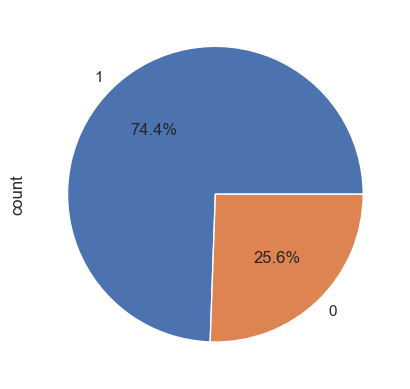

In [61]:
dataset["Malware"].value_counts().plot(kind="pie",autopct="%1.1f%%")
plt.show()

In [62]:
# Drop the 'Name' column as it is not needed for ML training

dataset = dataset.drop(['Name'], axis = 1)

In [63]:
dataset.shape

(19611, 78)

In [64]:
dataset.head()

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
0,23117,144,3,0,4,0,65535,0,184,0,...,3758096608,0,7,152,0,0,54440,77824,73728,0
1,23117,144,3,0,4,0,65535,0,184,0,...,3791650880,0,16,311,0,0,262276,294912,0,346112
2,23117,144,3,0,4,0,65535,0,184,0,...,3221225536,0,6,176,0,0,36864,40960,0,0
3,23117,144,3,0,4,0,65535,0,184,0,...,3224371328,0,8,155,0,0,356352,1003520,0,14109472
4,23117,144,3,0,4,0,65535,0,184,0,...,3227516992,0,2,43,0,0,61440,73728,0,90624


In [65]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19611 entries, 0 to 19610
Data columns (total 78 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   e_magic                       19611 non-null  int64  
 1   e_cblp                        19611 non-null  int64  
 2   e_cp                          19611 non-null  int64  
 3   e_crlc                        19611 non-null  int64  
 4   e_cparhdr                     19611 non-null  int64  
 5   e_minalloc                    19611 non-null  int64  
 6   e_maxalloc                    19611 non-null  int64  
 7   e_ss                          19611 non-null  int64  
 8   e_sp                          19611 non-null  int64  
 9   e_csum                        19611 non-null  int64  
 10  e_ip                          19611 non-null  int64  
 11  e_cs                          19611 non-null  int64  
 12  e_lfarlc                      19611 non-null  int64  
 13  e

In [66]:
# Separate X and y
# X is the features of the dataset and
# y is the label of the dataset


X = dataset.drop(['Malware'], axis = 1)
y = dataset['Malware']

In [67]:
# Spliting the data into Training Set and Test Set at a ratio of 80:20


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [68]:
#Select the most relevant features out of the 77 features

In [69]:
# Initialize and train the Random Forest Classifier algorithm

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [70]:
# Get the Feature Importance that model has learnt
importances = rf_model.feature_importances_

In [71]:
importances

array([0.00000000e+00, 1.92164075e-03, 1.62397335e-03, 6.42974001e-05,
       3.93987746e-04, 4.17730126e-04, 2.37455123e-03, 2.84447635e-07,
       1.80759146e-03, 3.13082094e-06, 2.43251332e-04, 2.62320135e-05,
       3.75481551e-05, 2.41715353e-03, 2.38182411e-04, 1.42369447e-04,
       7.08286568e-03, 1.72068825e-03, 4.71983960e-03, 7.11217140e-02,
       7.46890918e-05, 2.94947701e-04, 1.97450983e-03, 5.77492911e-02,
       2.21136664e-03, 8.34455096e-02, 1.95559005e-03, 6.88142621e-03,
       2.86694262e-02, 6.35595620e-04, 1.32536493e-02, 3.47076640e-03,
       4.88277179e-02, 4.65453344e-03, 1.79088573e-03, 5.81584948e-02,
       8.01982476e-02, 1.53680339e-02, 3.98653583e-02, 7.44818349e-02,
       3.88307540e-02, 1.23175574e-02, 1.88620647e-02, 6.75289405e-03,
       4.64155497e-02, 2.16384287e-02, 7.26924716e-02, 3.55444789e-03,
       1.94412561e-03, 7.99726084e-04, 1.20812902e-04, 2.04925144e-06,
       4.43259365e-03, 6.54190845e-05, 3.18656431e-03, 1.32149171e-02,
      

In [72]:
# add correspodnign feature names

feature_names = X.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

In [73]:
importance_df

,Feature,Importance
0,e_magic,0.000000
1,e_cblp,0.001922
2,e_cp,0.001624
3,e_crlc,0.000064
4,e_cparhdr,0.000394
...,...,...
72,ImageDirectoryEntryExport,0.019266
73,ImageDirectoryEntryImport,0.007441
74,ImageDirectoryEntryResource,0.004742
75,ImageDirectoryEntryException,0.001530


In [74]:
# Sort them by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

importance_df

,Feature,Importance
25,MajorLinkerVersion,0.083446
36,MinorOperatingSystemVersion,0.080198
39,MajorSubsystemVersion,0.074482
46,SizeOfStackReserve,0.072692
19,TimeDateStamp,0.071122
...,...,...
58,SectionMaxRawsize,0.000000
68,SectionMainChar,0.000000
66,SectionMinPointerData,0.000000
62,SectionMinPhysical,0.000000


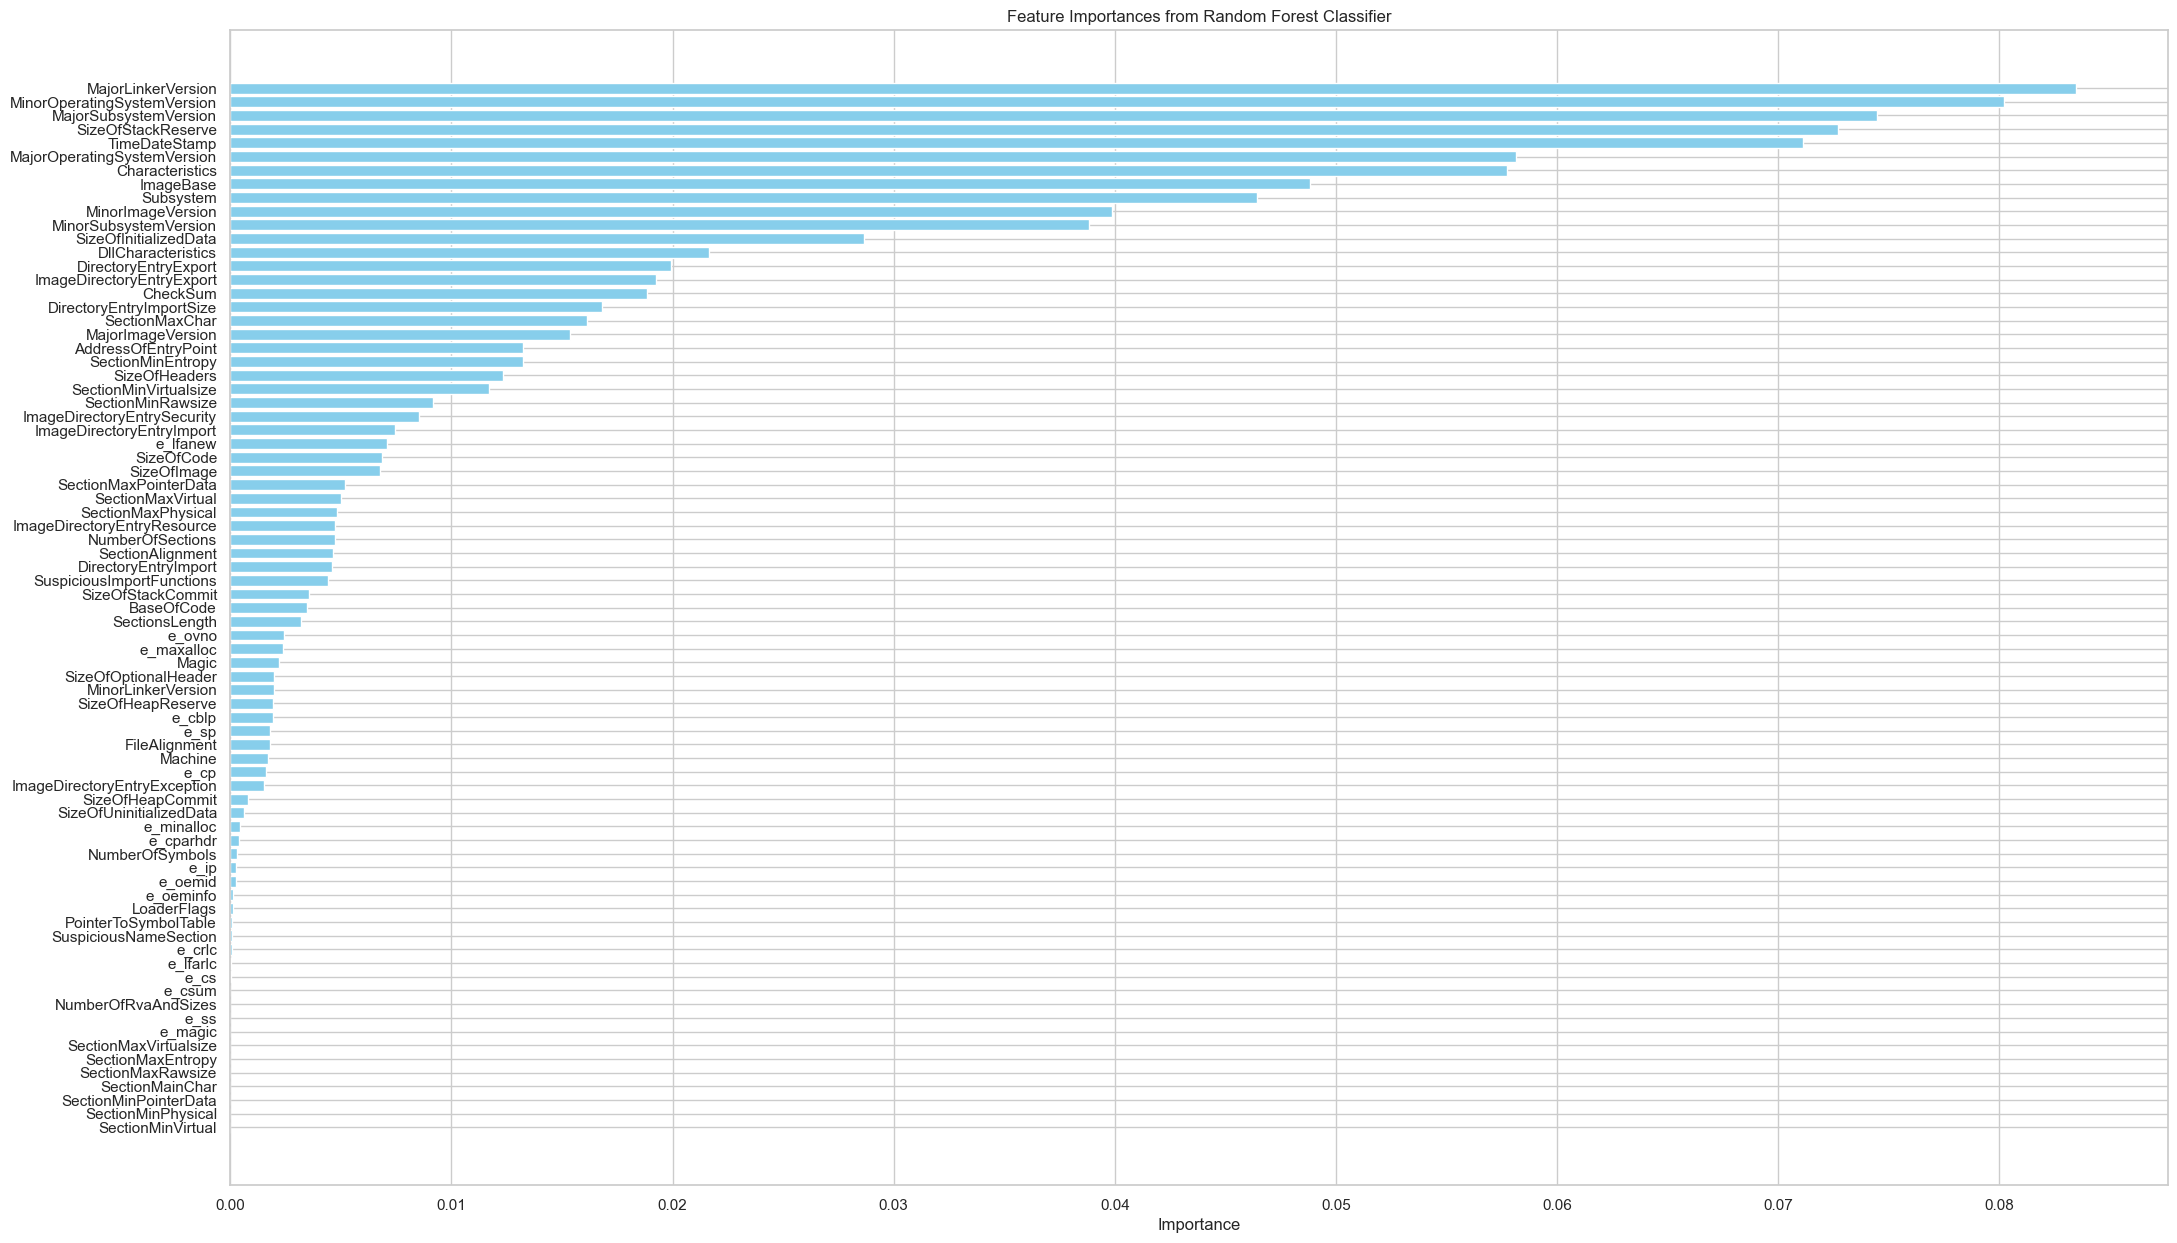

In [75]:
# Now Visualize Feature Importances
plt.figure(figsize=(25, 15))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances from Random Forest Classifier')
plt.gca().invert_yaxis()  # Invert y axis to show the most important features at the top
plt.show()

#Now set a feature score threshold to select features above that threshold

In [76]:
# Set the importance threshold
importance_threshold = 0.01

In [77]:
# Filter out features based on the importance threshold
important_features = importance_df[importance_df['Importance'] > importance_threshold]['Feature']

print(f"Features selected (importance > {importance_threshold}):\n{important_features.values}")

Features selected (importance > 0.01):
['MajorLinkerVersion' 'MinorOperatingSystemVersion'
 'MajorSubsystemVersion' 'SizeOfStackReserve' 'TimeDateStamp'
 'MajorOperatingSystemVersion' 'Characteristics' 'ImageBase' 'Subsystem'
 'MinorImageVersion' 'MinorSubsystemVersion' 'SizeOfInitializedData'
 'DllCharacteristics' 'DirectoryEntryExport' 'ImageDirectoryEntryExport'
 'CheckSum' 'DirectoryEntryImportSize' 'SectionMaxChar'
 'MajorImageVersion' 'AddressOfEntryPoint' 'SectionMinEntropy'
 'SizeOfHeaders' 'SectionMinVirtualsize']


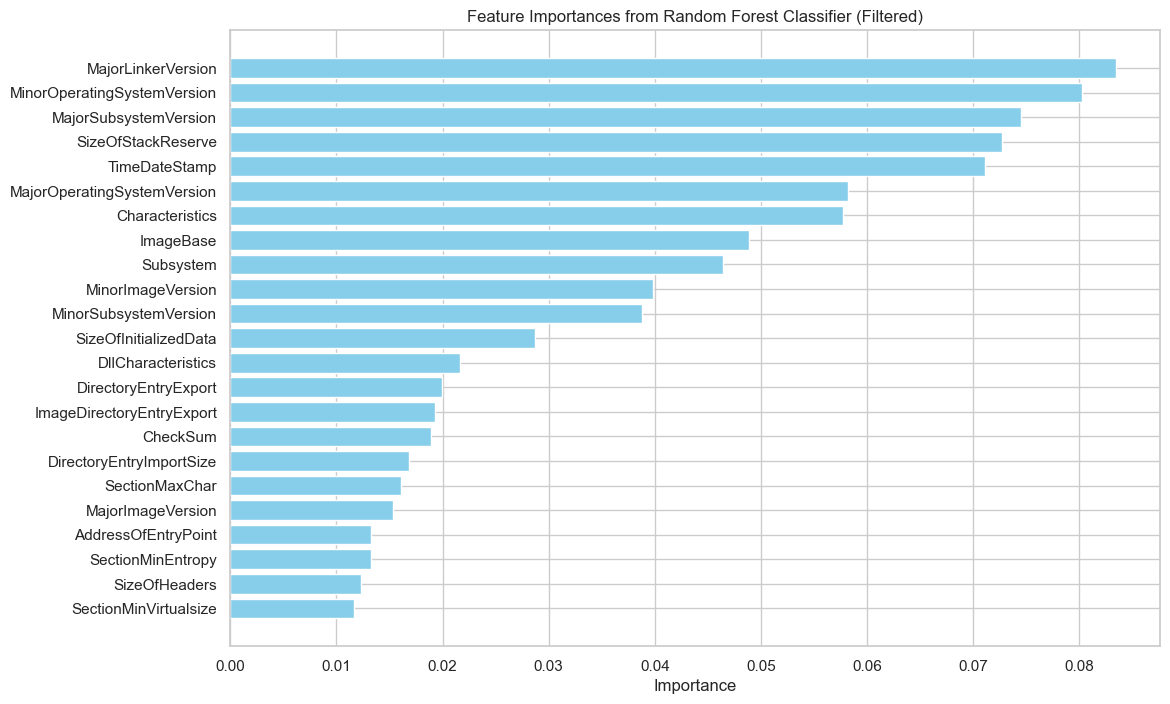

In [78]:
# Now Visualize them

plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'][importance_df['Importance'] > importance_threshold],
         importance_df['Importance'][importance_df['Importance'] > importance_threshold],
         color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances from Random Forest Classifier (Filtered)')
plt.gca().invert_yaxis()
plt.show()

In [79]:
# now filter out only the above features from the dataset

important_features_list = important_features.tolist()  # Convert to list
important_features_dataset = dataset[important_features_list]  # Filter the dataset

In [80]:
important_features_dataset.head()

,MajorLinkerVersion,MinorOperatingSystemVersion,MajorSubsystemVersion,SizeOfStackReserve,TimeDateStamp,MajorOperatingSystemVersion,Characteristics,ImageBase,Subsystem,MinorImageVersion,...,DirectoryEntryExport,ImageDirectoryEntryExport,CheckSum,DirectoryEntryImportSize,SectionMaxChar,MajorImageVersion,AddressOfEntryPoint,SectionMinEntropy,SizeOfHeaders,SectionMinVirtualsize
0,8,0,5,524288,1236512358,6,34,4294967296,2,0,...,0,0,295281,152,3758096608,6,51316,0.000000,1024,274
1,9,0,5,1048576,1365109591,5,258,4194304,2,0,...,0,0,0,311,3791650880,0,84654,3.815281,1024,24124
2,6,0,4,1048576,1438777028,4,14,4194304,2,0,...,0,0,0,176,3221225536,0,27364,0.103538,4096,329
3,2,0,4,2097152,1354629311,4,783,4194304,2,0,...,0,0,14174816,155,3224371328,6,16685,0.000000,1024,144
4,2,0,4,2097152,1386631250,4,783,4194304,2,0,...,0,0,0,43,3227516992,1,4416,0.000000,1024,24


In [81]:
important_features_dataset.shape

(19611, 23)

In [82]:
important_features_dataset.columns

Index(['MajorLinkerVersion', 'MinorOperatingSystemVersion',
       'MajorSubsystemVersion', 'SizeOfStackReserve', 'TimeDateStamp',
       'MajorOperatingSystemVersion', 'Characteristics', 'ImageBase',
       'Subsystem', 'MinorImageVersion', 'MinorSubsystemVersion',
       'SizeOfInitializedData', 'DllCharacteristics', 'DirectoryEntryExport',
       'ImageDirectoryEntryExport', 'CheckSum', 'DirectoryEntryImportSize',
       'SectionMaxChar', 'MajorImageVersion', 'AddressOfEntryPoint',
       'SectionMinEntropy', 'SizeOfHeaders', 'SectionMinVirtualsize'],
      dtype='object')

In [83]:
important_features_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19611 entries, 0 to 19610
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   MajorLinkerVersion           19611 non-null  int64  
 1   MinorOperatingSystemVersion  19611 non-null  int64  
 2   MajorSubsystemVersion        19611 non-null  int64  
 3   SizeOfStackReserve           19611 non-null  int64  
 4   TimeDateStamp                19611 non-null  int64  
 5   MajorOperatingSystemVersion  19611 non-null  int64  
 6   Characteristics              19611 non-null  int64  
 7   ImageBase                    19611 non-null  int64  
 8   Subsystem                    19611 non-null  int64  
 9   MinorImageVersion            19611 non-null  int64  
 10  MinorSubsystemVersion        19611 non-null  int64  
 11  SizeOfInitializedData        19611 non-null  int64  
 12  DllCharacteristics           19611 non-null  int64  
 13  DirectoryEntryEx

#Now check the numerical columns unique values

In [84]:
for i in range(len(important_features_dataset.columns)):
  print(important_features_dataset.columns[i], ':', important_features_dataset[important_features_dataset.columns[i]].nunique())

MajorLinkerVersion : 52
MinorOperatingSystemVersion : 26
MajorSubsystemVersion : 7
SizeOfStackReserve : 34
TimeDateStamp : 11145
MajorOperatingSystemVersion : 22
Characteristics : 103
ImageBase : 900
Subsystem : 6
MinorImageVersion : 114
MinorSubsystemVersion : 9
SizeOfInitializedData : 1962
DllCharacteristics : 75
DirectoryEntryExport : 373
ImageDirectoryEntryExport : 3280
CheckSum : 12236
DirectoryEntryImportSize : 671
SectionMaxChar : 100
MajorImageVersion : 53
AddressOfEntryPoint : 9481
SectionMinEntropy : 7947
SizeOfHeaders : 33
SectionMinVirtualsize : 3817


In [85]:
# features with less than 10 unique values in it

categorical_features = ['MajorSubsystemVersion', 'Subsystem', 'MinorSubsystemVersion']

In [86]:
# features with more than 10 unique values in it


numerical_features = [col for col in important_features_dataset.columns if col not in categorical_features]

In [87]:
categorical_features

['MajorSubsystemVersion', 'Subsystem', 'MinorSubsystemVersion']

In [88]:
numerical_features

['MajorLinkerVersion',
 'MinorOperatingSystemVersion',
 'SizeOfStackReserve',
 'TimeDateStamp',
 'MajorOperatingSystemVersion',
 'Characteristics',
 'ImageBase',
 'MinorImageVersion',
 'SizeOfInitializedData',
 'DllCharacteristics',
 'DirectoryEntryExport',
 'ImageDirectoryEntryExport',
 'CheckSum',
 'DirectoryEntryImportSize',
 'SectionMaxChar',
 'MajorImageVersion',
 'AddressOfEntryPoint',
 'SectionMinEntropy',
 'SizeOfHeaders',
 'SectionMinVirtualsize']

In [89]:
#analyze the categorical features

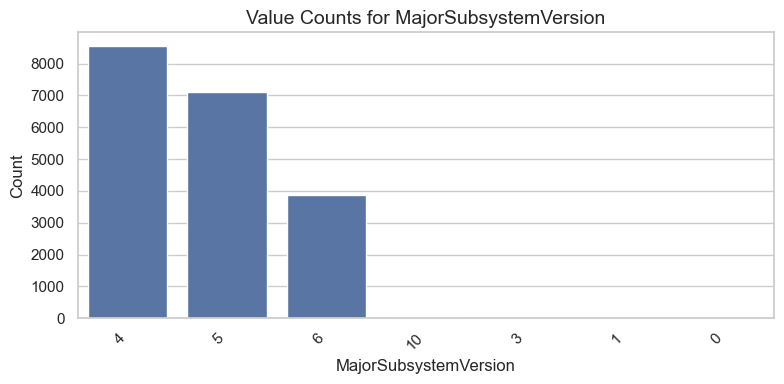

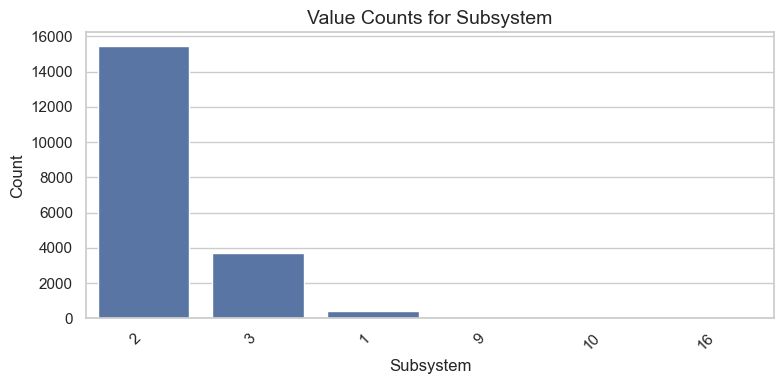

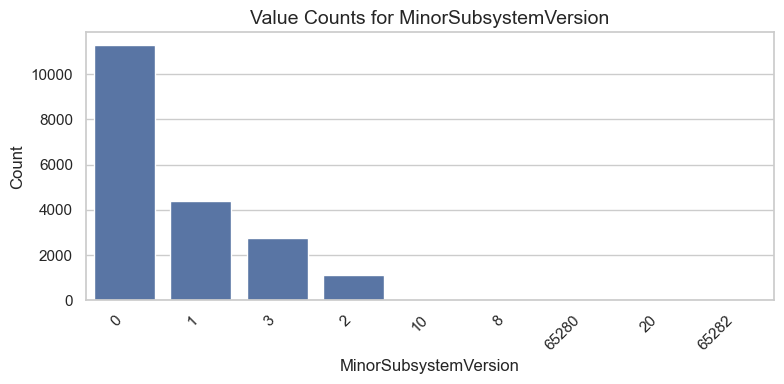

In [90]:
sns.set(style="whitegrid")


for col in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=important_features_dataset, x=col, order=important_features_dataset[col].value_counts().index)
    plt.title(f"Value Counts for {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

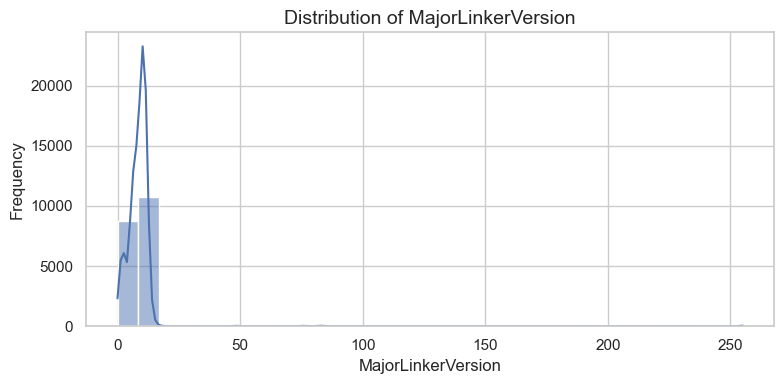

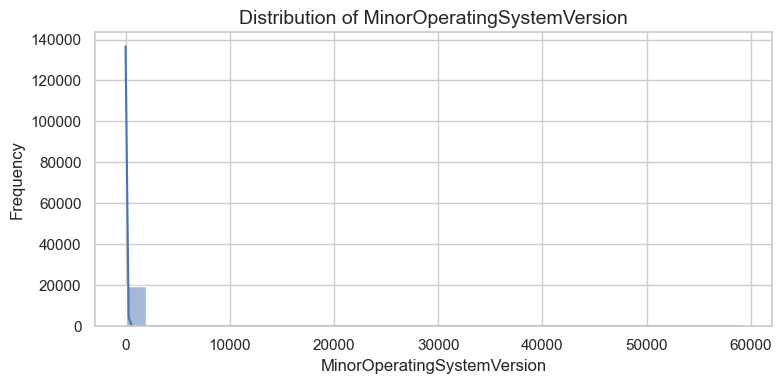

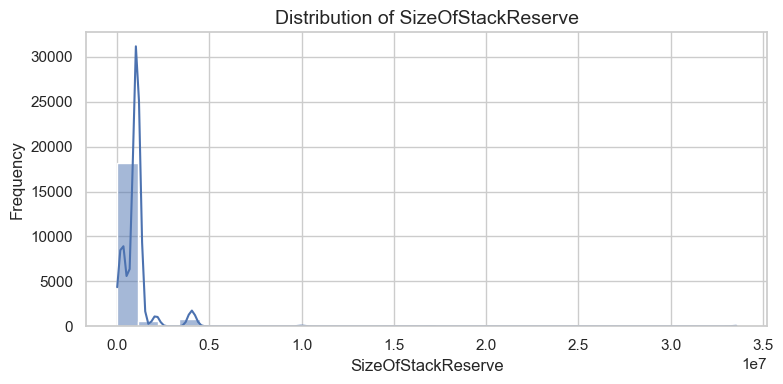

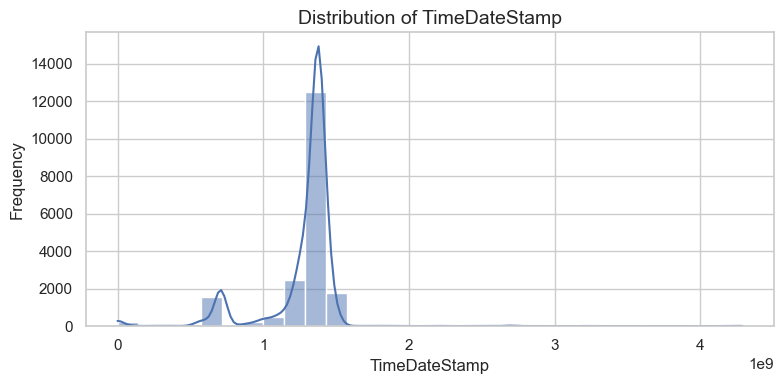

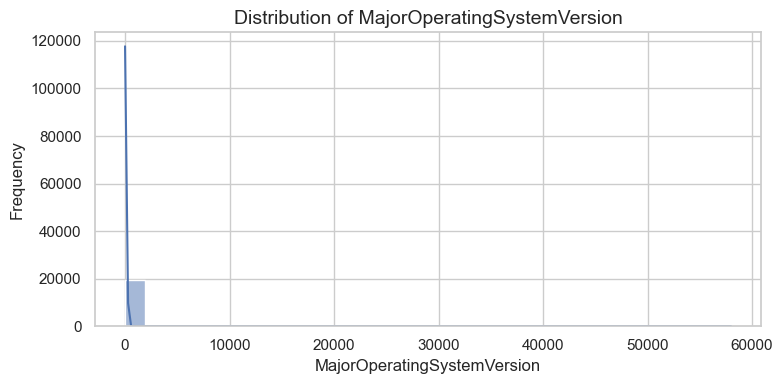

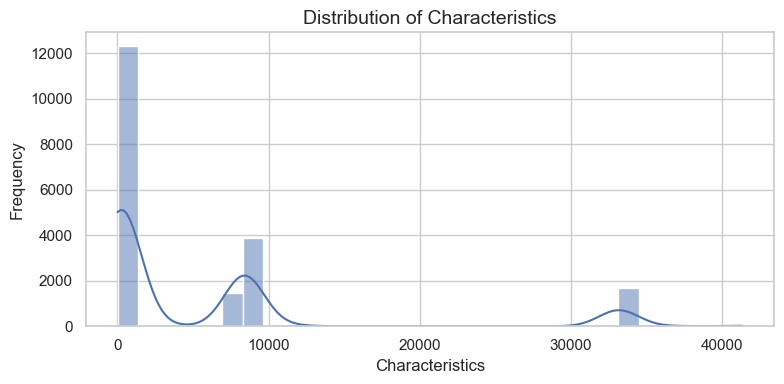

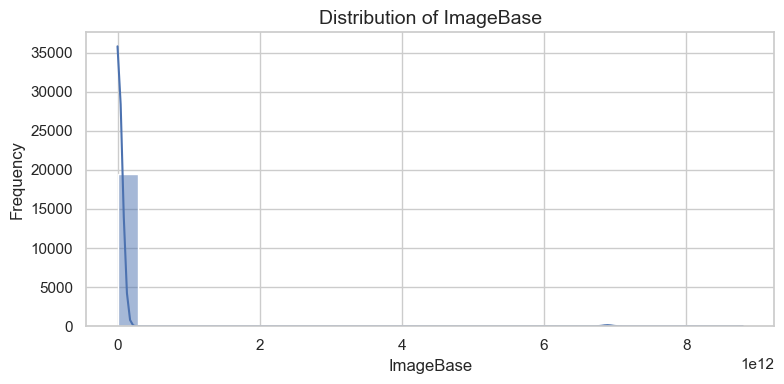

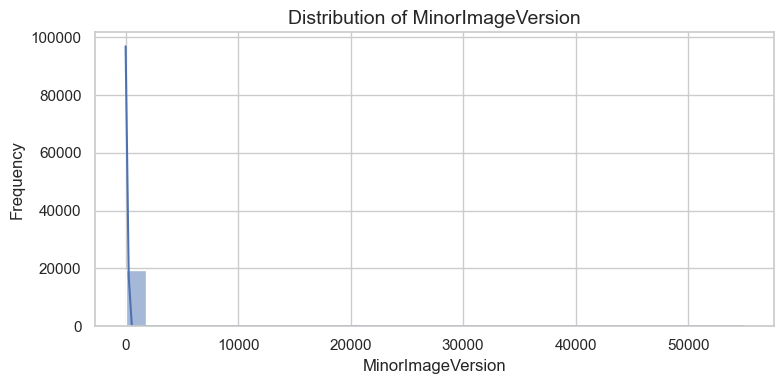

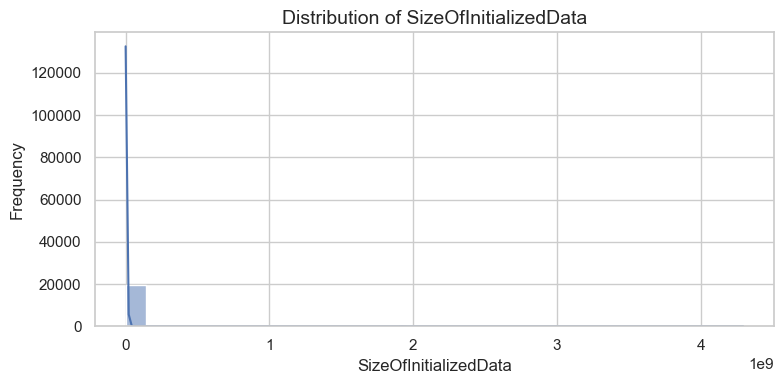

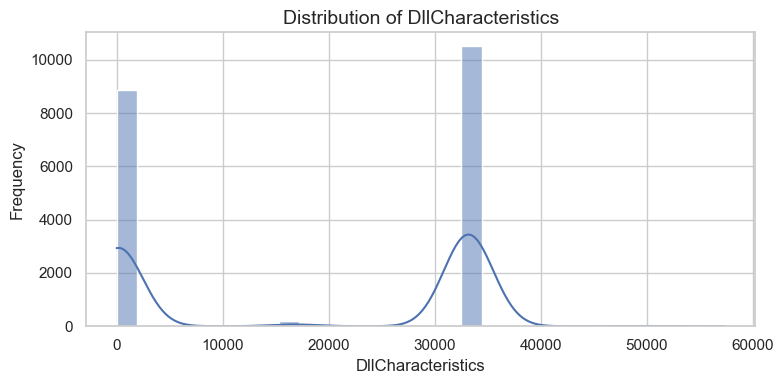

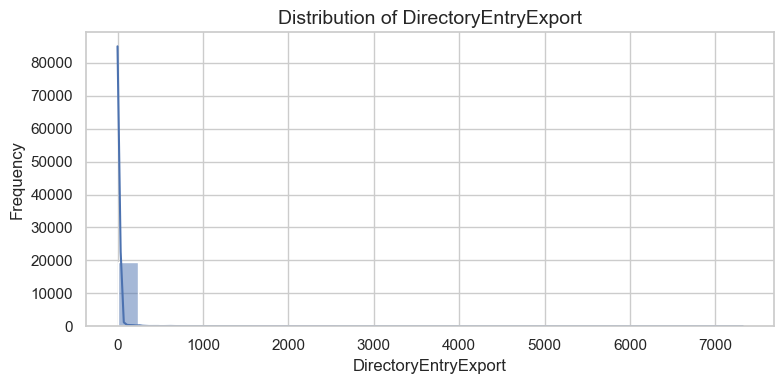

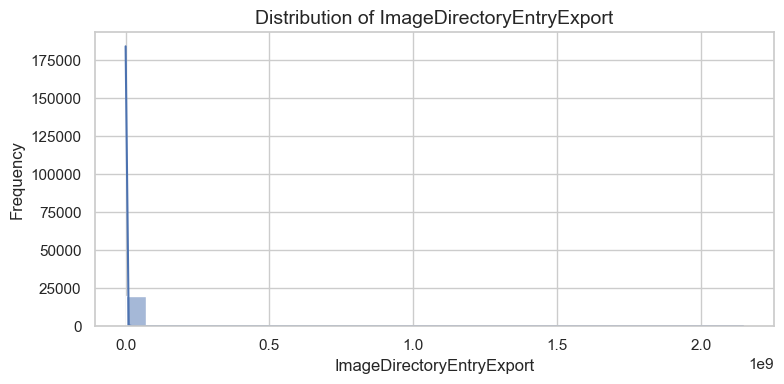

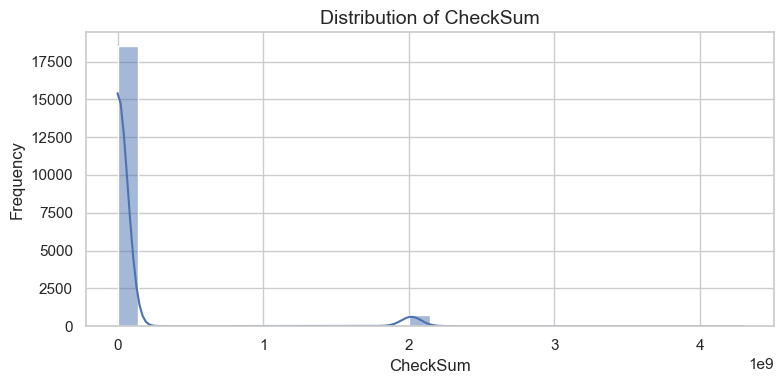

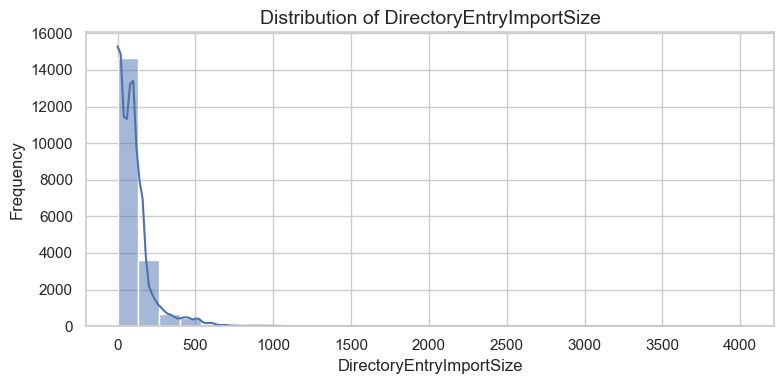

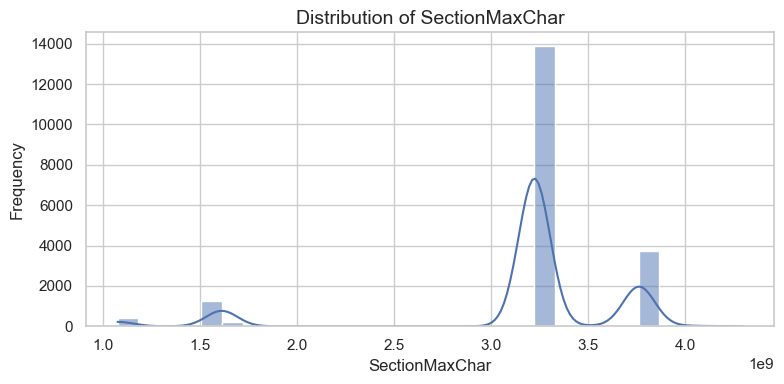

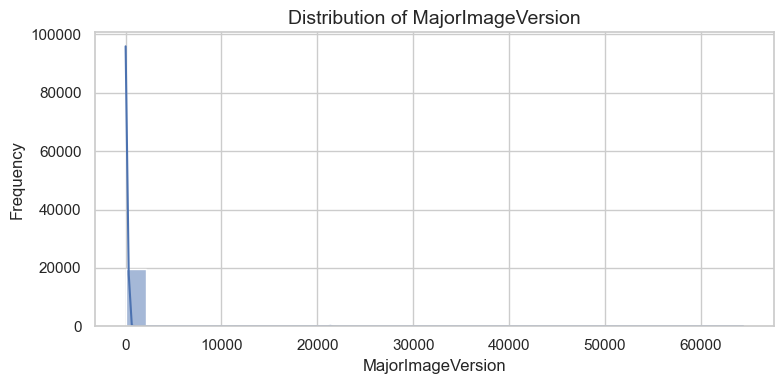

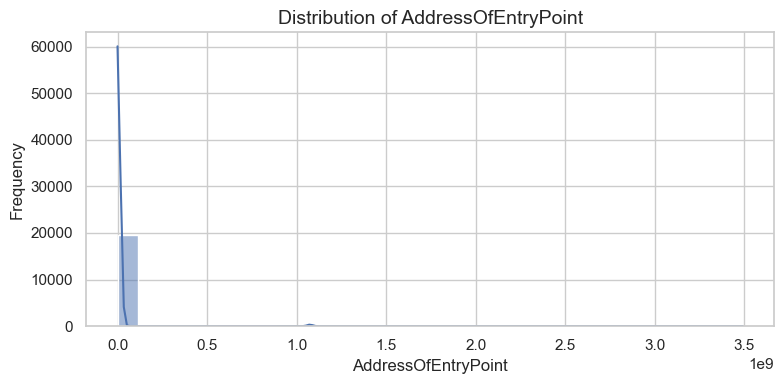

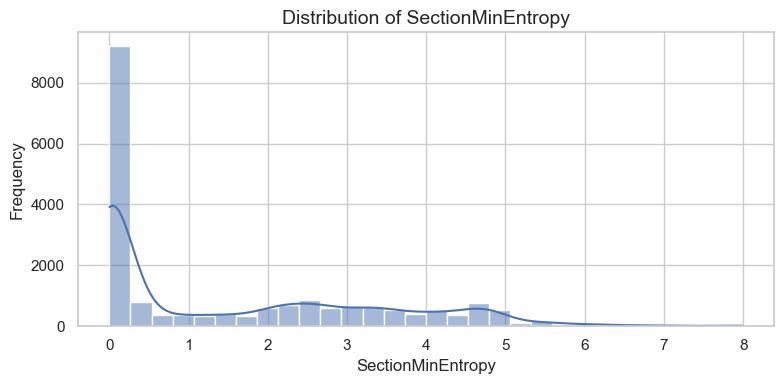

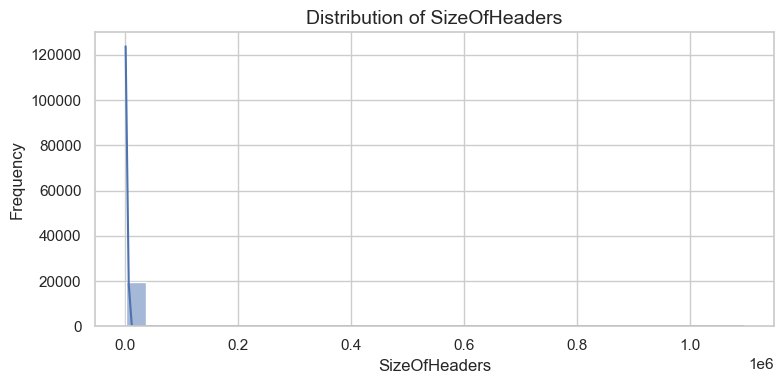

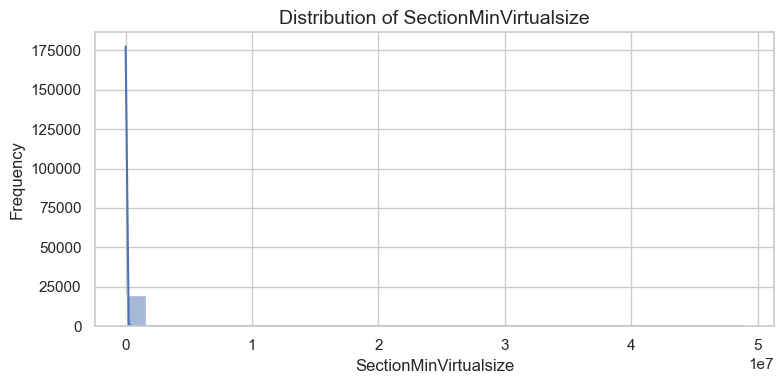

In [91]:
# Analyze the distribution of values

for col in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(important_features_dataset[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

In [92]:
# now concatenate the label back ot the dataset

important_features_dataset = pd.concat([important_features_dataset, dataset['Malware']], axis=1)

In [93]:
important_features_dataset.shape

(19611, 24)

In [94]:
important_features_dataset.head()

,MajorLinkerVersion,MinorOperatingSystemVersion,MajorSubsystemVersion,SizeOfStackReserve,TimeDateStamp,MajorOperatingSystemVersion,Characteristics,ImageBase,Subsystem,MinorImageVersion,...,ImageDirectoryEntryExport,CheckSum,DirectoryEntryImportSize,SectionMaxChar,MajorImageVersion,AddressOfEntryPoint,SectionMinEntropy,SizeOfHeaders,SectionMinVirtualsize,Malware
0,8,0,5,524288,1236512358,6,34,4294967296,2,0,...,0,295281,152,3758096608,6,51316,0.000000,1024,274,1
1,9,0,5,1048576,1365109591,5,258,4194304,2,0,...,0,0,311,3791650880,0,84654,3.815281,1024,24124,1
2,6,0,4,1048576,1438777028,4,14,4194304,2,0,...,0,0,176,3221225536,0,27364,0.103538,4096,329,1
3,2,0,4,2097152,1354629311,4,783,4194304,2,0,...,0,14174816,155,3224371328,6,16685,0.000000,1024,144,1
4,2,0,4,2097152,1386631250,4,783,4194304,2,0,...,0,0,43,3227516992,1,4416,0.000000,1024,24,1


In [95]:
# Save this dataset


important_features_dataset.to_csv('filtered_dataset.csv', index=False)

In [96]:
# load the dataset

important_features_dataset = pd.read_csv('filtered_dataset.csv')

In [97]:
important_features_dataset.shape

(19611, 24)

In [98]:
important_features_dataset.head()

,MajorLinkerVersion,MinorOperatingSystemVersion,MajorSubsystemVersion,SizeOfStackReserve,TimeDateStamp,MajorOperatingSystemVersion,Characteristics,ImageBase,Subsystem,MinorImageVersion,...,ImageDirectoryEntryExport,CheckSum,DirectoryEntryImportSize,SectionMaxChar,MajorImageVersion,AddressOfEntryPoint,SectionMinEntropy,SizeOfHeaders,SectionMinVirtualsize,Malware
0,8,0,5,524288,1236512358,6,34,4294967296,2,0,...,0,295281,152,3758096608,6,51316,0.000000,1024,274,1
1,9,0,5,1048576,1365109591,5,258,4194304,2,0,...,0,0,311,3791650880,0,84654,3.815281,1024,24124,1
2,6,0,4,1048576,1438777028,4,14,4194304,2,0,...,0,0,176,3221225536,0,27364,0.103538,4096,329,1
3,2,0,4,2097152,1354629311,4,783,4194304,2,0,...,0,14174816,155,3224371328,6,16685,0.000000,1024,144,1
4,2,0,4,2097152,1386631250,4,783,4194304,2,0,...,0,0,43,3227516992,1,4416,0.000000,1024,24,1
